# Generate s vs. z grid

In [7]:
# imports
import numpy as np

from matplotlib import pyplot as plt

from zdm.craco import loading

# Load the grid

In [3]:
survey, grid = loading.survey_and_grid(
    survey_name='CRACO_alpha1_Planck18_Gamma',
    NFRB=100, lum_func=1)

Loading survey: CRACO_alpha1_Planck18_Gamma
FRB survey succeffully initialised with  100  FRBs
Initialised grid


# Build it up

## Collapse on DM

In [8]:
z_coll = np.sum(grid.rates, axis=1)

### Plot

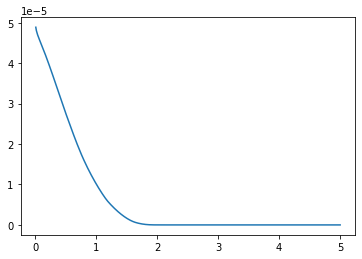

In [10]:
plt.clf()
ax = plt.gca()
ax.plot(grid.zvals, z_coll)
plt.show()

In [11]:
z_coll[-1]

0.0

# Init

In [13]:
ns = 1000
s_grid = np.zeros((z_coll.size, ns))

## s values

In [18]:
survey.SNRTHRESHs[0]

9.5

In [19]:
s_vals = np.linspace(survey.SNRTHRESHs[0], 1000., ns)

## One evaluation

In [20]:
grid.thresholds.shape

(10, 500, 1400)

In [21]:
grid.eff_weights.shape

(10,)

In [ ]:
Emax=10**grid.state.energy.lEmax
Emin=10**grid.state.energy.lEmin
gamma=grid.state.energy.gamma
#Eths has dimensions of width likelihoods and nobs
# i.e. later, the loop over j,w uses the first index
Eths = grid.thresholds[:,izs1,idms1]*(1.-dkdms)*(1-dkzs)
Eths += grid.thresholds[:,izs2,idms1]*(1.-dkdms)*dkzs
Eths += grid.thresholds[:,izs1,idms2]*dkdms*(1-dkzs)
Eths += grid.thresholds[:,izs2,idms2]*dkdms*dkzs

FtoE = grid.FtoE[izs1]*(1.-dkzs)
FtoE += grid.FtoE[izs2]*dkzs

beam_norm=np.sum(survey.beam_o)

# now do this in one go
# We integrate p(snr|b,w) p(b,w) db dw. 
# I have no idea how this could be multidimensional
psnr=np.zeros(Eths.shape[1])
for i,b in enumerate(survey.beam_b):
    bEths=Eths/b # array of shape NFRB, 1/b
    bEobs=bEths*survey.Ss
    for j,w in enumerate(grid.eff_weights):
        temp=grid.array_diff_lf(bEobs[j,:],Emin,Emax,gamma) * FtoE #one dim in beamshape, one dim in FRB

        psnr += temp.T*survey.beam_o[i]*w #multiplies by beam factors and weight
                

## Loop me..

In [16]:
grid.zvals[0]

0.01